<a href="https://colab.research.google.com/github/menaenahoro/Stutern_Group_Project/blob/main/Modelling_Group_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
import re
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Autochek_web_data.csv",index_col=0)
df.head()


,Name,Price,Mileage,Condition,Year,locations
0,Lexus LX 570,"₦ 50,015,000","21,204 km",Foreign Used,2018,"Ikate, Lekki, Lagos"
1,Toyota Camry,"₦ 5,015,000","140,309 km",Foreign Used,2013,"Ikorodu, Lagos"
2,Toyota Venza,"₦ 7,115,000","172,709 km",Foreign Used,2013,"Ipaja, Lagos"
3,Mercedes-Benz C 350,"₦ 4,815,000","114,936 km",Foreign Used,2010,"New road, Lekki, Lagos"
4,Toyota Lexus RX 450h,"₦ 8,515,000","77,012 mi",Foreign Used,2012,"New road, Lekki, Lagos"


In [77]:
df.locations.value_counts()

Festac, Lagos             1952
Ikate, Lekki, Lagos       1098
Gwarinpa, Abuja            610
Lagos, Lagos               610
Surulere, Lagos            366
New road, Lekki, Lagos     244
Jahi, Abuja                244
Anthony, Lagos             244
Ikorodu, Lagos             122
Ipaja, Lagos               122
Berger Mkt, Lagos          122
Kubwa Express, Abuja       122
Name: locations, dtype: int64

**PREPROCESSING**

In [78]:
'''firstly I'm going to split the words using ',' which would produce ['122323', 'km'] or ['12345', 'mi']'''
def Get_word(i):
  ban = i.split(" ")
  return ban

df['Mileage'] = df.apply(lambda row: Get_word(row['Mileage']), axis=1)

'''Then we filter the rows with 'mi' and convert then to 'km' '''
def Prep_word(i):
  bag = i[0]
  bag = bag.split(",")
  bag = bag[0]+bag[1]
  bag = int(bag)
  if i[-1]=="km":
    return bag
  elif i[-1]=="mi":
    return (bag*1.60934)

df['Mileage'] = df.apply(lambda row: Prep_word(row['Mileage']), axis=1)
df['Mileage'] = round(df['Mileage'], ndigits=1)
df['Mileage']

0        21204.0
1       140309.0
2       172709.0
3       114936.0
4       123938.5
          ...   
5851    282613.0
5852     71584.0
5853    112019.0
5854     98697.0
5855    106800.0
Name: Mileage, Length: 5856, dtype: float64

In [79]:
'''firstly I'm going to split the words using ',' which would produce ['122323', 'km'] or ['12345', 'mi']'''
def Get_Price(i):
  ban = i.split(" ")
  price = ban[-1]
  price = price.split(",")
  price = price[0]+price[1]+price[2]
  return int(price)

df['Price'] = df.apply(lambda row: Get_Price(row['Price']), axis=1)
df['Price']

0       50015000
1        5015000
2        7115000
3        4815000
4        8515000
          ...   
5851     2797500
5852     6515000
5853     5680000
5854     8770000
5855     9285000
Name: Price, Length: 5856, dtype: int64

**Merging Prevoiusly scrapped data from Cars45**

In [80]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/clean_car_df0.csv", index_col=None, header=0, engine='python' )
data.head()

,Name,Mileage,Year,Condition,Price
0,Ford F-150,177341,2005,Foreign Used,3270000
1,Mercedes-Benz C300,93916,2015,Nigerian Used,10090000
2,Mazda 3,201640,2010,Foreign Used,2250000
3,Nissan Almera,115599,2012,Nigerian Used,1018000
4,Toyota Camry,98986,2004,Nigerian Used,1578000


In [81]:
'''Remove the white space at the beginning and ending of each string in the column'''
data.Condition = data.Condition.str.strip()
data.Name = data.Name.str.strip()


In [85]:
data.Condition.value_counts()

Nigerian Used    3183
Foreign Used     1147
New                24
                    3
Name: Condition, dtype: int64

In [86]:
R_df = df.append(data, sort=False)
R_df.head()

,Name,Price,Mileage,Condition,Year,locations
0,Lexus LX 570,50015000,21204.0,Foreign Used,2018,"Ikate, Lekki, Lagos"
1,Toyota Camry,5015000,140309.0,Foreign Used,2013,"Ikorodu, Lagos"
2,Toyota Venza,7115000,172709.0,Foreign Used,2013,"Ipaja, Lagos"
3,Mercedes-Benz C 350,4815000,114936.0,Foreign Used,2010,"New road, Lekki, Lagos"
4,Toyota Lexus RX 450h,8515000,123938.5,Foreign Used,2012,"New road, Lekki, Lagos"


In [87]:
R_df.shape

(10213, 6)

In [88]:
nume_data = R_df.select_dtypes(include=[np.number])
nume_data.head()

,Price,Mileage,Year
0,50015000,21204.0,2018
1,5015000,140309.0,2013
2,7115000,172709.0,2013
3,4815000,114936.0,2010
4,8515000,123938.5,2012


In [89]:
cate_data = R_df.select_dtypes(exclude=[np.number])
cate_data.head()

,Name,Condition,locations
0,Lexus LX 570,Foreign Used,"Ikate, Lekki, Lagos"
1,Toyota Camry,Foreign Used,"Ikorodu, Lagos"
2,Toyota Venza,Foreign Used,"Ipaja, Lagos"
3,Mercedes-Benz C 350,Foreign Used,"New road, Lekki, Lagos"
4,Toyota Lexus RX 450h,Foreign Used,"New road, Lekki, Lagos"


In [90]:
R_df = R_df.drop(['locations'], axis=1)
R_df.head()

,Name,Price,Mileage,Condition,Year
0,Lexus LX 570,50015000,21204.0,Foreign Used,2018
1,Toyota Camry,5015000,140309.0,Foreign Used,2013
2,Toyota Venza,7115000,172709.0,Foreign Used,2013
3,Mercedes-Benz C 350,4815000,114936.0,Foreign Used,2010
4,Toyota Lexus RX 450h,8515000,123938.5,Foreign Used,2012


In [91]:
R_df.Condition.value_counts()

Foreign Used     6759
Nigerian Used    3183
Locally Used      244
New                24
                    3
Name: Condition, dtype: int64

In [92]:
from sklearn.preprocessing import LabelEncoder

In [94]:
df2 = R_df.copy()


In [99]:

# encode the categorical data
le_Name = LabelEncoder()
le_Condition = LabelEncoder()
df2['Name'] = le_Name.fit_transform(df2['Name'].astype(str))
df2['Condition'] = le_Condition.fit_transform(df2['Condition'].astype(str))

In [103]:
df3 = df2.copy()
df3 = df3.drop(['Price'], axis=1)
df3.head()

,Name,Mileage,Condition,Year
0,224,21204.0,1,2018
1,469,140309.0,1,2013
2,503,172709.0,1,2013
3,286,114936.0,1,2010
4,487,123938.5,1,2012


In [104]:
X = df3.iloc[:, :].values
Y = df2.iloc[:, 1].values
print(X)

[[2.24000e+02 2.12040e+04 1.00000e+00 2.01800e+03]
 [4.69000e+02 1.40309e+05 1.00000e+00 2.01300e+03]
 [5.03000e+02 1.72709e+05 1.00000e+00 2.01300e+03]
 ...
 [4.85000e+02 4.85020e+04 4.00000e+00 2.01000e+03]
 [3.52000e+02 8.04970e+04 4.00000e+00 2.00500e+03]
 [3.67000e+02 1.24776e+05 4.00000e+00 2.01200e+03]]


In [105]:
from sklearn.model_selection import train_test_split


In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=123
)

In [108]:
X_train

array([[3.300000e+02, 1.659010e+05, 1.000000e+00, 2.012000e+03],
       [4.710000e+02, 7.158400e+04, 1.000000e+00, 2.015000e+03],
       [4.950000e+02, 7.944800e+04, 1.000000e+00, 2.008000e+03],
       ...,
       [1.310000e+02, 1.463720e+05, 1.000000e+00, 2.013000e+03],
       [5.030000e+02, 1.727090e+05, 1.000000e+00, 2.013000e+03],
       [2.310000e+02, 1.097634e+05, 1.000000e+00, 2.013000e+03]])

In [109]:
# encode the numerical data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.02324368,  0.19144585, -0.70093215,  0.06793393],
       [ 0.89361764, -0.5705902 , -0.70093215,  0.1155479 ],
       [ 1.04967914, -0.50705286, -0.70093215,  0.00444863],
       ...,
       [-1.31725362,  0.03366091, -0.70093215,  0.08380526],
       [ 1.10169964,  0.24645122, -0.70093215,  0.08380526],
       [-0.66699737, -0.26211899, -0.70093215,  0.08380526]])

In [111]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
import xgboost as xgb


In [112]:
lin_model = LinearRegression()
ridge_model = Ridge(random_state=123)
rf = RandomForestRegressor(random_state=123)
ada_boost = AdaBoostRegressor(random_state=123)
svr = SVR()
xgb = xgb.XGBRegressor(random_state=123)

models = {
    "lin_model": lin_model,
    "ridge_model": ridge_model,
    "rf_model": rf,
    "ada_boost": ada_boost,
    "svr": svr,
    "xgb": xgb
}

In [113]:
def train_model(models: dict) -> pd.DataFrame:
    my_dict = {}
    name_list, r_sqd_list, mae_list, rmse_list = [], [], [], []
    for name, estimator in models.items():
        
        estimator.fit(X_train, y_train)

        
        y_pred = estimator.predict(X_test)

        
        r_sqd = metrics.r2_score(y_test, y_pred)
        mae = metrics.mean_absolute_error(y_test, y_pred)
        mse = metrics.mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        
        name_list.append(name)
        r_sqd_list.append(r_sqd)
        mae_list.append(mae)
        rmse_list.append(rmse)

    my_dict["Name"] = name_list
    my_dict["R_squared"] = r_sqd_list
    my_dict["Mean_absolute_error"] = mae_list
    my_dict["Root_mean_sqd_error"] = rmse_list

    my_df = pd.DataFrame(my_dict)
    my_df = my_df.sort_values("Root_mean_sqd_error")
    return my_df

In [114]:
train_model(models)

[10:05:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Name,R_squared,Mean_absolute_error,Root_mean_sqd_error
2,rf_model,0.898910,1.083350e+06,2.563552e+06
5,xgb,0.887968,1.475387e+06,2.698720e+06
3,ada_boost,0.684319,3.009633e+06,4.530138e+06
1,ridge_model,0.157608,4.183971e+06,7.400214e+06
0,lin_model,0.157608,4.184007e+06,7.400216e+06
4,svr,-0.066601,4.378218e+06,8.326993e+06


**Tuning the Hyperparameters**

In [115]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}



**Hyperparameter using RandomizedSearch and Cross-validation(cv)**

In [116]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [117]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=2, random_state=123, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 24.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [118]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1800}

In [119]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: ₦{:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


In [120]:
base_model = RandomForestRegressor(n_estimators = 100, random_state = 123)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_train, y_train)


Model Performance
Average Error: ₦736399.6333.
Accuracy = 85.99%.


In [121]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_train, y_train)


Model Performance
Average Error: ₦780501.1301.
Accuracy = 84.09%.


In [122]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of -2.21%.


**Hyperparameter using GridSearch**

In [123]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf0 = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf0, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [124]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 19.3min finished


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [ ]:
best_grid0 = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid0, X_train, y_train)

In [126]:
y_pred = best_random.predict(X_test)

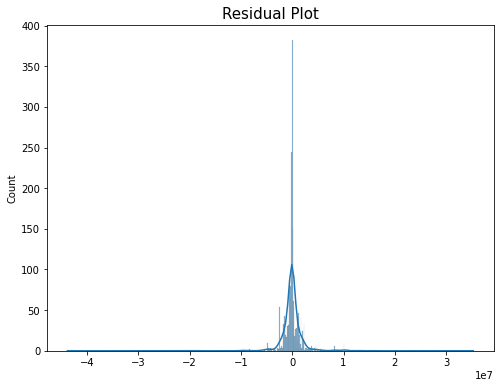

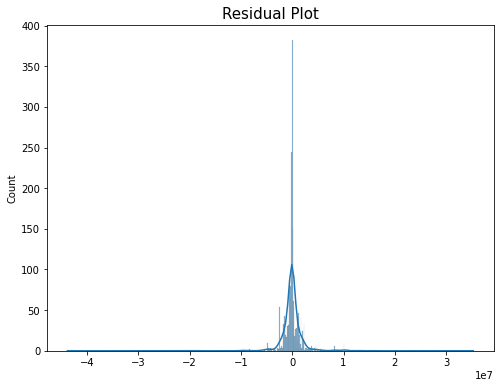

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

#Residual Plot
residual = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residual, kde=True)
plt.title("Residual Plot", size=15)

plt.show()


In [128]:
y_pred0 = best_grid0.predict(X_test)

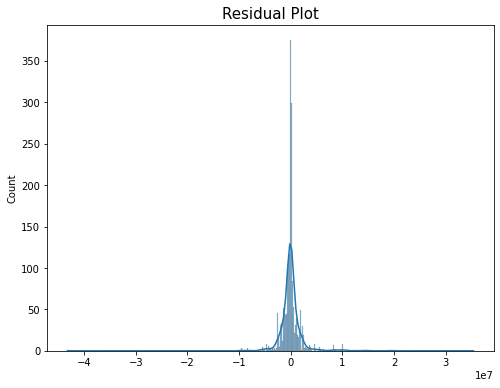

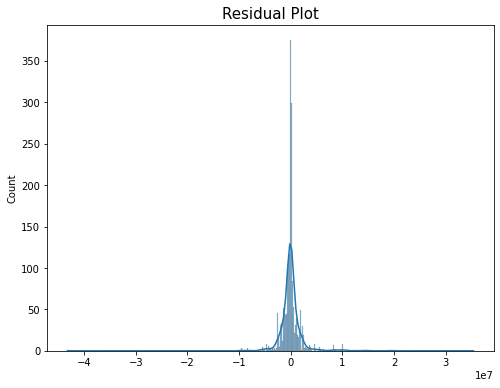

In [129]:
#Residual Plot
residual = y_test - y_pred0

plt.figure(figsize=(8, 6))
sns.histplot(residual, kde=True)
plt.title("Residual Plot", size=15)

plt.show()


**NEW PREDICTIONS**

In [130]:
df.sample(5, random_state=123)

,Name,Price,Mileage,Condition,Year,locations
1980,Toyota Highlander,13515000,20820.0,Foreign Used,2016,"Anthony, Lagos"
646,Lexus RX 350,7765000,137471.0,Foreign Used,2010,"Festac, Lagos"
5544,Lexus ES 350,50015000,72443.0,Foreign Used,2011,"Festac, Lagos"
1435,Toyota Camry,2797500,282613.0,Foreign Used,2006,"Lagos, Lagos"
2147,Lexus ES 350,2815000,98219.0,Foreign Used,2013,"Ikate, Lekki, Lagos"


,Name,Price,Mileage,Condition,Year,locations
1980,Toyota Highlander,13515000,20820.0,Foreign Used,2016,"Anthony, Lagos"
646,Lexus RX 350,7765000,137471.0,Foreign Used,2010,"Festac, Lagos"
5544,Lexus ES 350,50015000,72443.0,Foreign Used,2011,"Festac, Lagos"
1435,Toyota Camry,2797500,282613.0,Foreign Used,2006,"Lagos, Lagos"
2147,Lexus ES 350,2815000,98219.0,Foreign Used,2013,"Ikate, Lekki, Lagos"


In [131]:
#Name	Price	Mileage	Condition	Year	locations
new_data = [["Lexus ES 350", 72443.0, "Foreign Used", 2011]]
# convert to array
new_data = np.array(new_data)
new_data

array([['Lexus ES 350', '72443.0', 'Foreign Used', '2011']], dtype='<U12')

array([['Lexus ES 350', '72443.0', 'Foreign Used', '2011']], dtype='<U12')

In [132]:
new_data[:, 0] = le_Name.transform(new_data[:, 0])
new_data[:, 2] = le_Condition.transform(new_data[:, 2])
new_data

array([['199', '72443.0', '1', '2011']], dtype='<U12')

array([['199', '72443.0', '1', '2011']], dtype='<U12')

In [133]:
new_data = sc.transform(new_data)
new_data

array([[-0.87507937, -0.56364989, -0.70093215,  0.05206261]])

array([[-0.87507937, -0.56364989, -0.70093215,  0.05206261]])

In [134]:
price = best_grid0.predict(new_data)
price = round(price[0])  # round to the neaarest Naira

print(f"The estimated cost of the Car is NGN {price:,}")


The estimated cost of the Car is NGN 49,445,247
The estimated cost of the Car is NGN 49,445,247


**SAVING THE MODEL AS A PICKLE FILE**

In [135]:
import pickle

model = {}
model["model0"] = best_grid0
model["Name"] = le_Name
model["Condition"] = le_Condition
model["Standard_Scalar"] = sc
model["Average_error"] = 997124.4961

with open("./drive/My Drive/Colab Notebooks/Group_estimator.pkl", "wb") as f:
    pickle.dump(model, f)

In [136]:
# load the model
with open("./drive/My Drive/Colab Notebooks/Group_estimator.pkl", "rb") as f:
    loaded_model = pickle.load(f)

**Testing the Model**

In [137]:
RF = loaded_model["model0"]  # regressor
Name = loaded_model["Name"]  # Name label encoder
Condition = loaded_model["Condition"] #Name label encoder
Standard_Scalar = loaded_model["Standard_Scalar"]  # location label encoder
Average_error = loaded_model["Average_error"]  # location label encoder

In [138]:
# type, address, bed, bath, toilet, pkn_space
new_data0 = [["Lexus ES 350", 72443.0, "Foreign Used", 2011]]
# convert to array
new_data0 = np.array(new_data0)

In [139]:
new_data0[:, 0] = Name.transform(new_data0[:, 0])
new_data0[:, 2] = Condition.transform(new_data0[:, 2])
new_data0

array([['199', '72443.0', '1', '2011']], dtype='<U12')

array([['199', '72443.0', '1', '2011']], dtype='<U12')

In [140]:
new_data0 = Standard_Scalar.transform(new_data0)
new_data0

array([[-0.87507937, -0.56364989, -0.70093215,  0.05206261]])

array([[-0.87507937, -0.56364989, -0.70093215,  0.05206261]])

In [142]:
price0 = RF.predict(new_data)
price0 = round(price0[0])  # round to the neaarest Naira
price_a = Average_error+price0
price_b = price0-Average_error
print(f"The estimated cost of the Car is NGN{price_a:,} - NGN{price_b:,}")

The estimated cost of the Car is NGN50,442,371.4961 - NGN48,448,122.5039
